In [1]:
import pandas as pd
df = pd.read_csv('../../../data/raw/aquifer/petrignano.csv')
print(df.shape)
df.head()

(5223, 8)


,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [3]:
df.columns.tolist()

['Date',
 'Rainfall_Bastia_Umbra',
 'Depth_to_Groundwater_P24',
 'Depth_to_Groundwater_P25',
 'Temperature_Bastia_Umbra',
 'Temperature_Petrignano',
 'Volume_C10_Petrignano',
 'Hydrometry_Fiume_Chiascio_Petrignano']

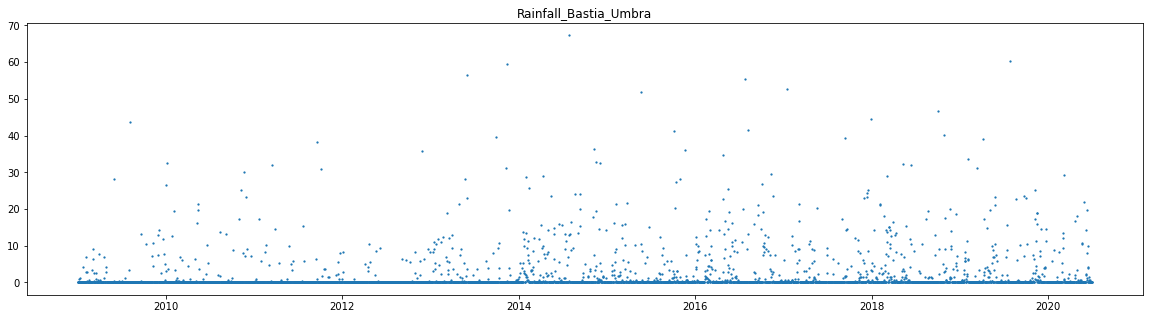

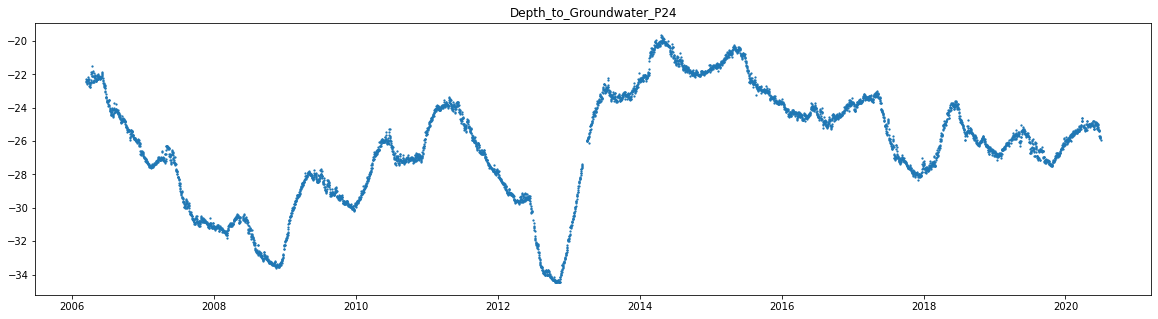

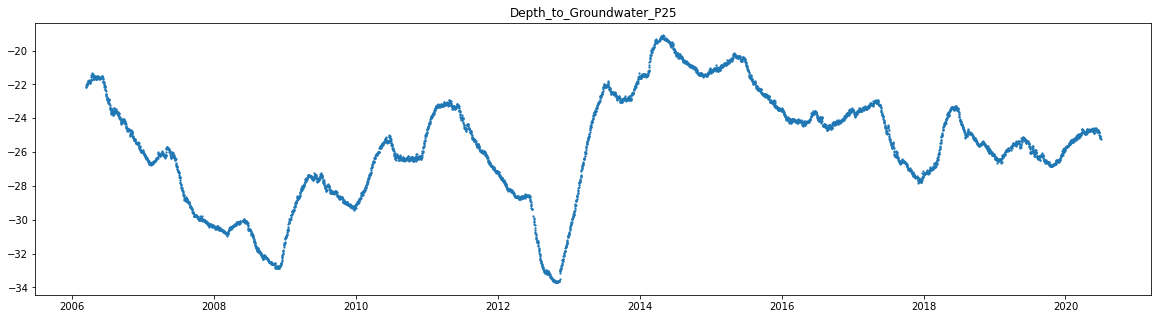

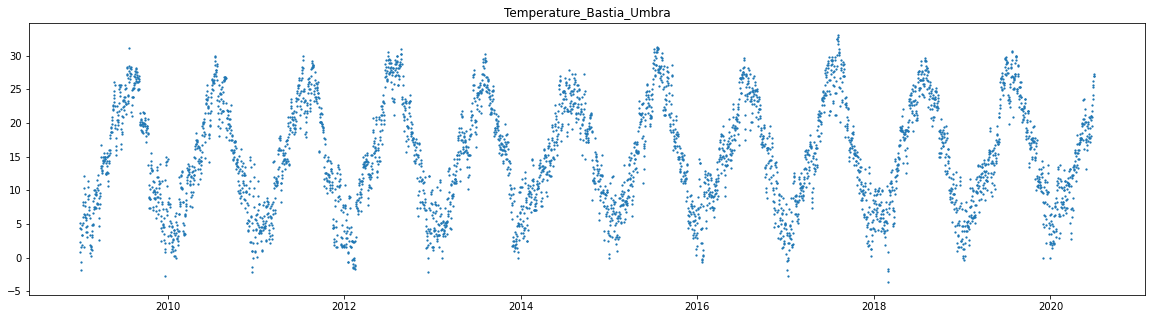

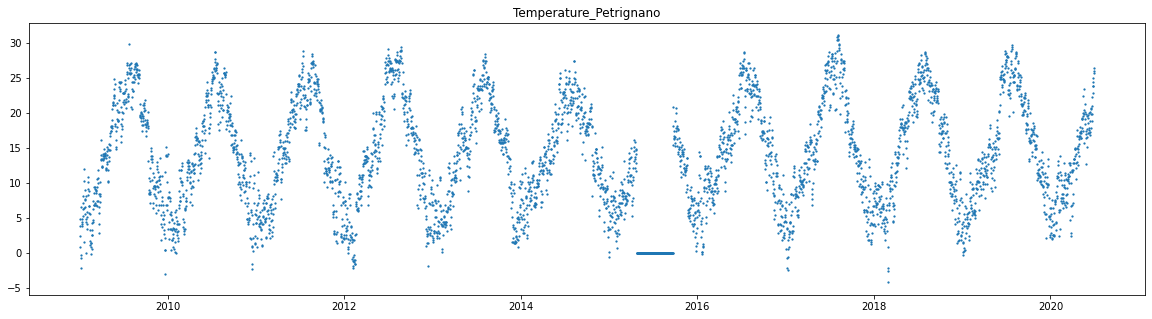

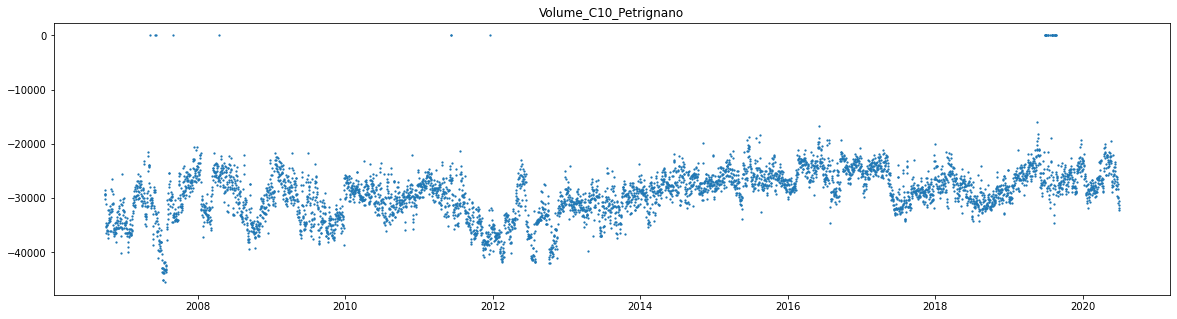

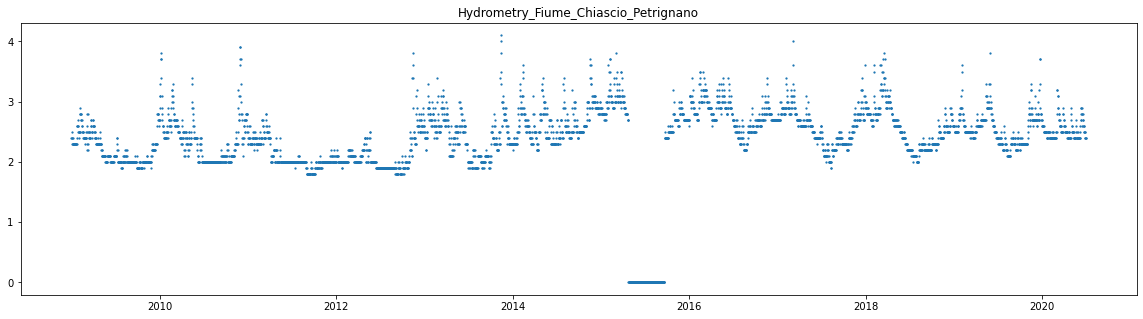

In [7]:
import matplotlib.pyplot as plt
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
for c in df.columns:
    if c == 'Date':
        continue
    fig, ax = plt.subplots(1, 1, figsize=(20,5))
    ax.scatter(df['Date'], df[c], s=1.5)
    ax.set_title(c)
    plt.show()

In [ ]:
# to be abs'd:
#   Depth_to_Groundwater_P24
#   Depth_to_Groundwater_P25
#   Volume_C10_Petrignano

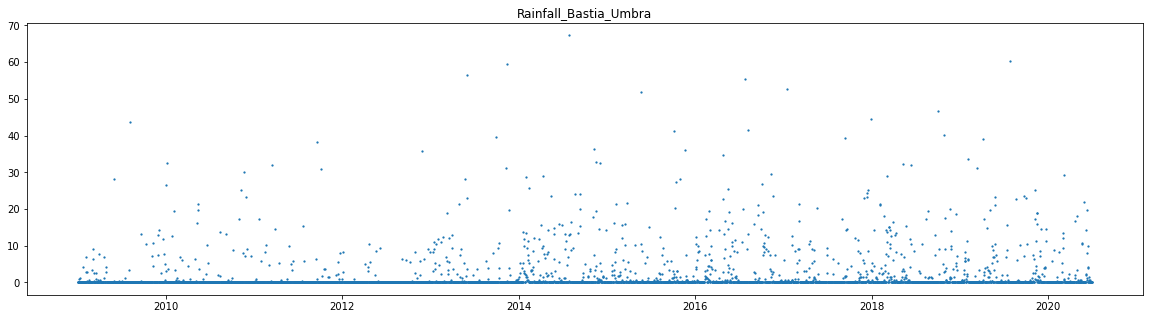

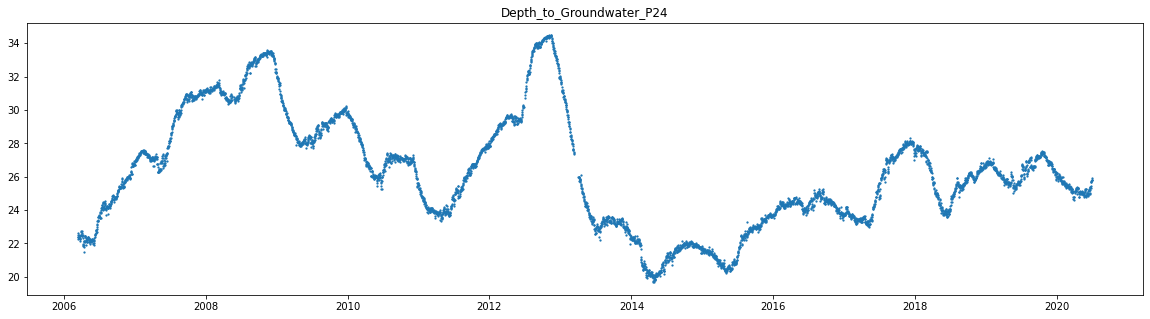

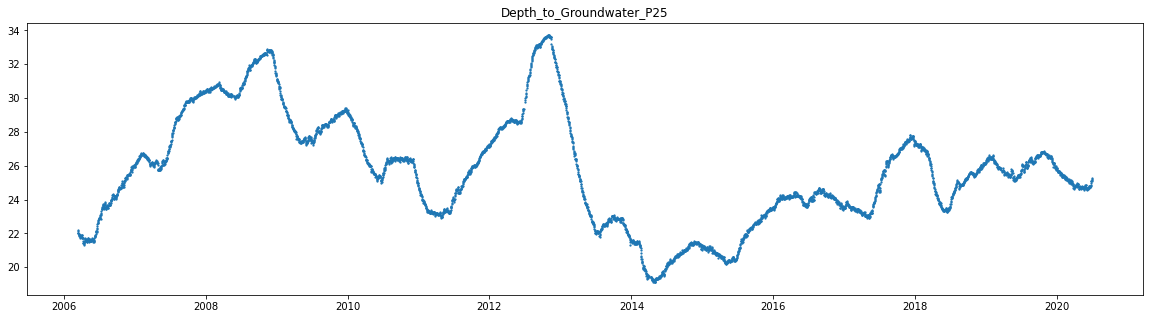

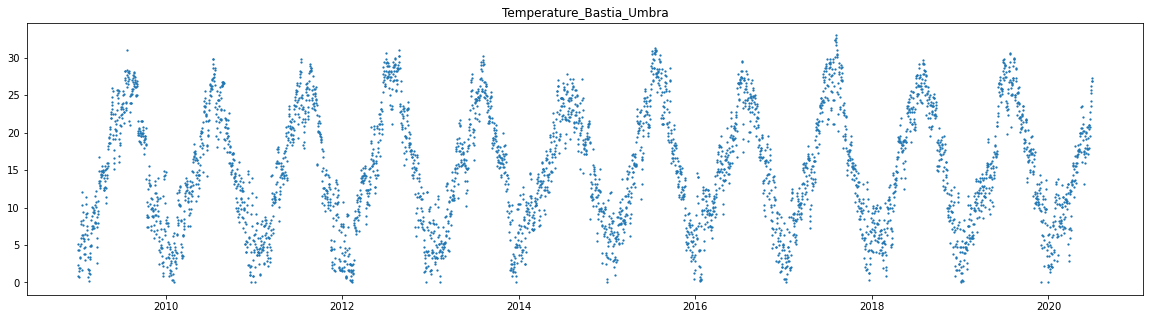

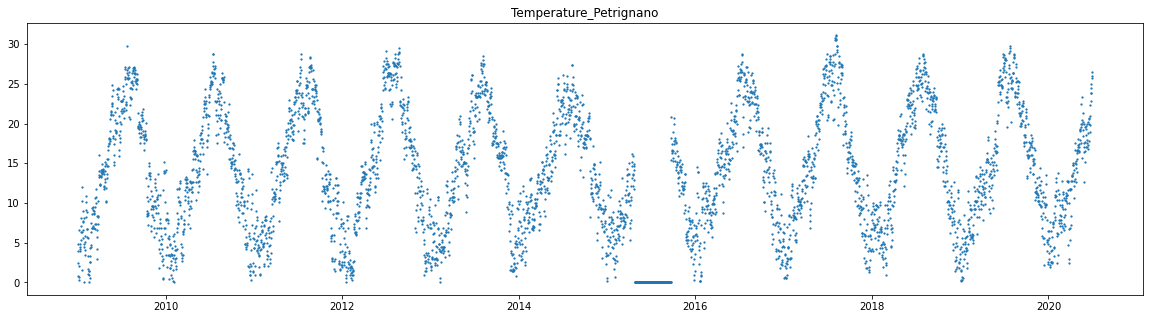

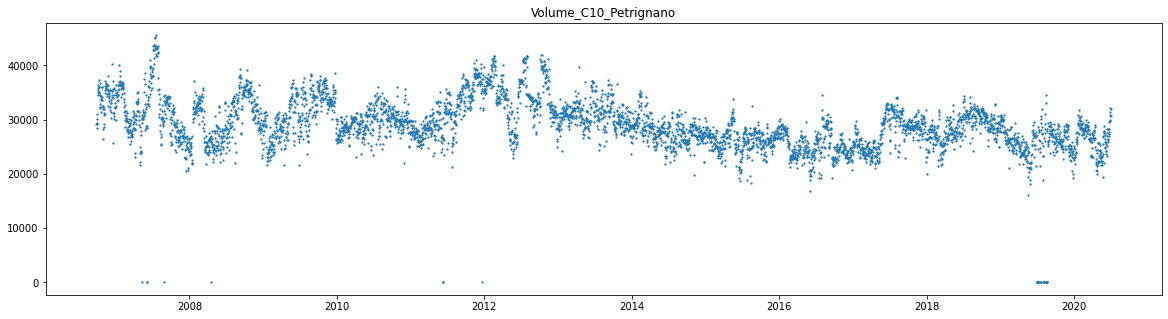

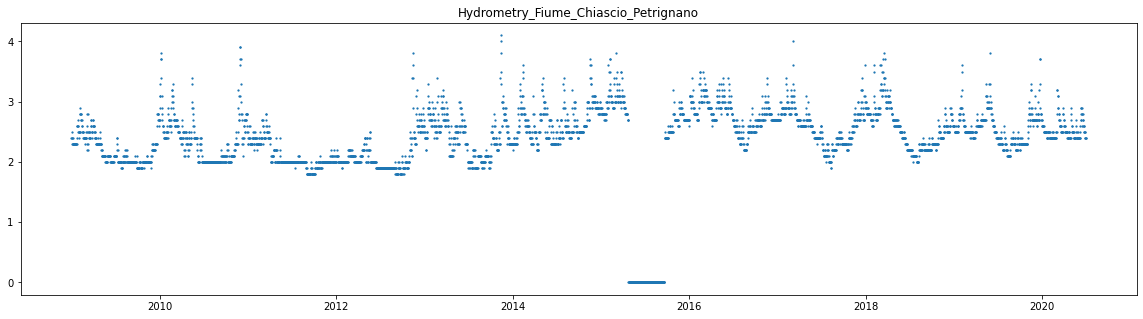

In [8]:
import matplotlib.pyplot as plt
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
for c in df.columns:
    if c == 'Date':
        continue
    fig, ax = plt.subplots(1, 1, figsize=(20,5))
    ax.scatter(df['Date'], df[c].abs(), s=1.5)
    ax.set_title(c)
    plt.show()

In [ ]:
# using 0 for NaN:
#   Temperature_Petrignano
#   Volume_C10_Petrignano
#   Hydrometry_Fiume_Chiascio_Petrignano

In [9]:
df.isnull().sum()

Date                                       0
Rainfall_Bastia_Umbra                   1024
Depth_to_Groundwater_P24                  55
Depth_to_Groundwater_P25                  39
Temperature_Bastia_Umbra                1024
Temperature_Petrignano                  1024
Volume_C10_Petrignano                    198
Hydrometry_Fiume_Chiascio_Petrignano    1024
dtype: int64

In [11]:
print('First:', df.iloc[0]['Date'].strftime('%D'))
print('Last:', df.iloc[-1]['Date'].strftime('%D'))

First: 03/14/06
Last: 06/30/20


In [12]:
for c in df.columns:
    print(
        c,
        '...',
        df[~df[c].isnull()].iloc[0]['Date'].strftime('%D'),
        '--',
        df[~df[c].isnull()].iloc[-1]['Date'].strftime('%D')
    )

Date ... 03/14/06 -- 06/30/20
Rainfall_Bastia_Umbra ... 01/01/09 -- 06/30/20
Depth_to_Groundwater_P24 ... 03/14/06 -- 06/30/20
Depth_to_Groundwater_P25 ... 03/14/06 -- 06/30/20
Temperature_Bastia_Umbra ... 01/01/09 -- 06/30/20
Temperature_Petrignano ... 01/01/09 -- 06/30/20
Volume_C10_Petrignano ... 09/27/06 -- 06/30/20
Hydrometry_Fiume_Chiascio_Petrignano ... 01/01/09 -- 06/30/20


In [ ]:
# chop off: prior to 1/1/09

In [13]:
from datetime import datetime
df = df[df['Date'] > datetime(2008, 12, 31)]
100 * df.isnull().sum() / df.shape[0]

Date                                    0.000000
Rainfall_Bastia_Umbra                   0.000000
Depth_to_Groundwater_P24                0.928793
Depth_to_Groundwater_P25                0.643010
Temperature_Bastia_Umbra                0.000000
Temperature_Petrignano                  0.000000
Volume_C10_Petrignano                   0.023815
Hydrometry_Fiume_Chiascio_Petrignano    0.000000
dtype: float64

In [14]:
df.isnull().sum()

Date                                     0
Rainfall_Bastia_Umbra                    0
Depth_to_Groundwater_P24                39
Depth_to_Groundwater_P25                27
Temperature_Bastia_Umbra                 0
Temperature_Petrignano                   0
Volume_C10_Petrignano                    1
Hydrometry_Fiume_Chiascio_Petrignano     0
dtype: int64

In [19]:
#df[(df['Temperature_Petrignano'] == 0) & (df['Date'] > datetime(2015, 1, 1))]
#df[(df['Volume_C10_Petrignano'] == 0)]
#df[(df['Hydrometry_Fiume_Chiascio_Petrignano'] == 0)]
df.loc[df[(df['Temperature_Petrignano'] == 0) & (df['Date'] > datetime(2015, 1, 1))].index, 'Temperature_Petrignano'] = float('nan')
df.loc[df[df['Volume_C10_Petrignano'] == 0].index, 'Volume_C10_Petrignano'] = float('nan')
df.loc[df[df['Hydrometry_Fiume_Chiascio_Petrignano'] == 0].index, 'Hydrometry_Fiume_Chiascio_Petrignano'] = float('nan')

In [20]:
df.isnull().sum()

Date                                      0
Rainfall_Bastia_Umbra                     0
Depth_to_Groundwater_P24                 39
Depth_to_Groundwater_P25                 27
Temperature_Bastia_Umbra                  0
Temperature_Petrignano                  150
Volume_C10_Petrignano                    26
Hydrometry_Fiume_Chiascio_Petrignano    150
dtype: int64